In [90]:
import numpy as np
import matplotlib.pyplot as plt

Start up your interface of choice and define a helper function, whose purpose is to make a HTTP GET request to a specified URL ("endpoint"), and verify that the response is successful

In [135]:
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"4e2c93455bbc8e991a91a61ef5e11daa"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

Issue a request to the API root.

In [136]:
r = get(baseUrl)

The response is a dictionary object with one key, "simulations", which is a list of N (currently 45 in this example) available runs:

In [137]:
r.keys()

dict_keys(['simulations'])

In [138]:
len(r['simulations'])

45

Print out all fields of the first, as well as the names of all fourty-five

In [139]:
r['simulations'][0]

{'name': 'Illustris-1',
 'num_snapshots': 134,
 'url': 'http://www.tng-project.org/api/Illustris-1/'}

In [140]:
names = [sim['name'] for sim in r['simulations']]
names 

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG300-1-Subbox0']

Let's take a look at Illustris-3 by determining which entry in r it is, then requesting the url field of that entry

In [141]:
i = names.index('Illustris-3')
i

4

In [142]:
sim = get(r['simulations'][i]['url'])
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [143]:
sim['num_dm']

94196375

Note - we do not actually need to construct the URL by hand. 
This in general is true, whenever an API response refers to another resource or endpoint , it does so with an absolute URL, which can be directly followed to retrieve that resource. Meaning, that there is no need to know the structure of the API in order to navigate it.

In this case, we could have seen from the reference table at the bottom of this page, that the endpoint which retreives the full metadata for a given simulation is /api/{sim_name}/. Therefore we can manually construct the URL --- and send a request. Alternatively we can simply follow the url field that we already have to arrive at the same place.

In [144]:
sim['snapshots']

'http://www.tng-project.org/api/Illustris-3/snapshots/'

In [145]:
snaps = get(sim['snapshots'])
len(snaps)

136

In [146]:
# there are 136 snapshots, inspect the last one, which corresponds to z = 0.
snaps[-1]

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 121209,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/'}

In [147]:
snap = get(snaps[-1]['url'])
snap

{'simulation': 'http://www.tng-project.org/api/Illustris-3/',
 'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_gas': 87571556,
 'num_dm': 94196375,
 'num_trmc': 94196375,
 'num_stars': 4388167,
 'num_bhs': 33582,
 'num_groups_fof': 131727,
 'num_groups_subfind': 121209,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 23437820660.0,
 'filesize_groupcat': 114056740.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/',
 'subhalos': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': '

In [148]:
# request and inspect the subhalos endpoint.
subs = get(snap['subhalos'])
subs.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [149]:
subs['count']

121209

In [150]:
subs['next']

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=100&offset=100'

In [151]:
len(subs['results'])

100

The response is a paginated list of all Subfind subhalos which ecist at this snapshot. The default page size is 100 elements, this can be overriden by specifing a limit param

In [152]:
subs = get(snap['subhalos'], {'limit':220})
len(subs['results'])

220

In [153]:
subs['next']

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=220&offset=220'

In [154]:
subs['results'][0]

{'id': 0,
 'sfr': 4.11098,
 'mass_log_msun': 14.554690443287308,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/0/'}

In [155]:
subs = get(snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'})

In [156]:
len(subs['results'])

20

In [157]:
[subs['results'][i]['id'] for i in range(5)]

[0, 1030, 2074, 2302, 2843]

Note - ordering:
You can order by any field in the catalog.

As expected, bc subhalo IDs are assigned in order of descending total mass, the most massive subhalo (with ID==0) also has the most stars. The next ID(1030) is likely a central subhalo of a subsequent FoF halo.

In [158]:
# get the full subhalo info for ID==1030
sub = get(subs['results'][1]['url'])
sub

{'snap': 135,
 'id': 1030,
 'bhmdot': 0.199144,
 'cm_x': 10992.8,
 'cm_y': 50807.7,
 'cm_z': 47671.3,
 'gasmetallicity': 0.00787963,
 'gasmetallicityhalfrad': 0.0167215,
 'gasmetallicitymaxrad': 0.053106,
 'gasmetallicitysfr': 0.0510764,
 'gasmetallicitysfrweighted': 0.0518217,
 'pos_x': 10908.2,
 'pos_y': 50865.5,
 'pos_z': 47651.8,
 'halfmassrad': 527.237,
 'halfmassrad_gas': 660.879,
 'halfmassrad_dm': 510.476,
 'halfmassrad_stars': 50.759,
 'halfmassrad_bhs': 0.0,
 'len': 1113373,
 'len_gas': 448911,
 'len_dm': 624445,
 'len_stars': 39946,
 'len_bhs': 71,
 'mass': 20463.1,
 'mass_gas': 2678.49,
 'mass_dm': 17620.2,
 'mass_stars': 158.333,
 'mass_bhs': 6.04079,
 'massinhalfrad': 496.772,
 'massinhalfrad_gas': 5.39936,
 'massinhalfrad_dm': 406.895,
 'massinhalfrad_stars': 79.1619,
 'massinhalfrad_bhs': 5.31633,
 'massinmaxrad': 5.28624,
 'massinmaxrad_gas': 0.007397,
 'massinmaxrad_dm': 0.0,
 'massinmaxrad_stars': 0.015315,
 'massinmaxrad_bhs': 5.26353,
 'massinrad': 1352.77,
 'massi

The response is a combo of numeric fields and links to related objects, as well as additional data.

In [159]:
# directly request a group catalog field dump of the parent FoF halo
url = sub['related']['parent_halo'] + "info.json"
url

'http://www.tng-project.org/api/Illustris-3/snapshots/135/halos/2/info.json'

In [160]:
parent_fof = get(url)
parent_fof.keys()

dict_keys(['SimulationName', 'SnapshotNumber', 'InfoType', 'InfoID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupFuzzOffsetType', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'StellarMasses', 'TracerLength', 'TracerOffset'])

We see that subhalo 1030 is indeed the central for this FoF 2, which has 366 total subhalos.

Return to the subhalo - make some requests which return HDF5 data. Extend our helper function so that if it recieves a binary response, it saves it to a file with the appropriate name

In [161]:
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)
    
    # raise expectation if response code is not HTTP SUCESS (200)
    r.raise_for_status()
    
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    
    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string 
    
    return r

Request the main progenitor branch from the SubLink merger trees of this subhalo.


In [163]:
import h5py
mpb1 = get(sub['trees']['sublink_mpb']) # file saved, mpb1 contains the filename

f = h5py.File(mpb1, 'r')
print(f.keys())

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'Group_M_Crit200', 'Group_M_Mean200', 'Group_M_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloID', 'SubhaloIDMostbound', 'SubhaloIDRaw', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetallicity', 'SubhaloStar

In [164]:
print(len(f['SnapNum']))

104


In [165]:
f.close()

We see this subhalo was tracked back to snapshot 32 in the SubLink tree. For comparison, get the main progenitor branch from the LHaloTree.

In [166]:
mpb2 = get(sub['trees']['lhalotree_mpb']) # file saved, mpb2 contains the filename 

In [167]:
with h5py.File(mpb2, 'r') as f:
    print(len(f['SnapNum']))

104


So the LHaloTree goes back to the same snapshot. Further inspection would show that in this case the tracking is similar (same z=0z=0 descendant), but not identical, which is often the case. Let's plot the evolution the subhalo position, along each coordinate axis, back in time.

In [169]:
with h5py.File(mpb2,'r') as f:
    pos = f['SubhaloPos'][:]
    snapnum = f['SnapNum'][:]
    subid = f['SubhaloNumber'][:]

Text(0, 0.5, 'Pos$_{x,y,z}$(z) - Pos(z=0)')

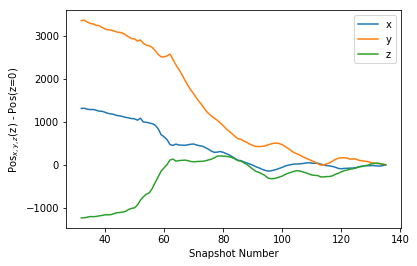

In [170]:
for i in range(3):
    plt.plot(snapnum,pos[:,i] - pos[0,i], label=['x','y','z'][i])
plt.legend()
plt.xlabel('Snapshot Number')
plt.ylabel('Pos$_{x,y,z}$(z) - Pos(z=0)')

Finally, let's get an actual cutout of snapshot data. Our goal: an image of the gas density at z=1 progenitor of our subhalo

What is the snapshot we are looking for

In [171]:
url = sim['snapshots'] + "z=1/"

In [172]:
url

'http://www.tng-project.org/api/Illustris-3/snapshots/z=1/'

In [173]:
snap = get(url)

In [174]:
snap['number'], snap['redshift']

(85, 0.9972942257819399)

Find the target Subfind ID at snapshot 85 using the Subtree link

In [176]:
i = np.where(snapnum == 85)

In [202]:
subid[i]

array([185], dtype=int32)

Request the subhalo details, and a snapshot cutout consisting only of Gas fields Coordinates, Masses

In [203]:
sub_prog_url = 'http://www.tng-project.org/api/Illustris-3/snapshots/85/subhalos/185/'

In [204]:
sub_prog = get(sub_prog_url)

In [205]:
sub_prog['pos_x'], sub_prog['pos_y']

(11013.3, 51469.6)

In [219]:
cutout_request = {'gas':'Coordinates, Masses'}

In [220]:
cutout_request

{'gas': 'Coordinates, Masses'}

In [221]:
sub = sub_prog_url+'cutout.hdf5'

Make a quick 2d histogram visualization of the distribution of gas bound to this subhalo

Getting a 403 error saying bad request for url - uncomment when figured out -- should get histogram

In [223]:
#cutout = get(sub_prog_url+'cutout.hdf5', cutout_request)

In [217]:
#with h5py.File(cutout,'r') as f:
#    x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
#    y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
#    dens = np.log10(f['PartType0']['Masses'][:])

#plt.hist2d(x,y,weights=dens,bins=[150,100])
#plt.xlabel('$\Delta x$ [ckpc/h]')
#plt.ylabel('$\Delta y$ [ckpc/h]');